In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') # '나눔고딕' 폰트 적용



In [121]:
train = pd.read_csv('병원train.csv')
test = pd.read_csv('병원test.csv')

train.shape, test.shape

((301, 58), (127, 58))

In [122]:
# train.head()

In [123]:
train.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2',
       'employee1', 'employee2', 'ownerChange'],
      dtype='object')

In [124]:
train_column=pd.DataFrame({'columns':train.columns,
                        'info' :['각 파일에서의 병원 고유 번호',
                                      '영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함',
                                      '병원의 광역 지역 정보',
                                      '병원의 시군구 자료',
                                      '병원 설립일','병원이 갖추고 있는 병상의 수',
                                      '병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류 종합병원 : 입원환자 100명 이상 수용 가능 병원 : 입원 환자 30명 이상 100명 미만 수용 가능 의원 : 입원 환자 30명 이하 수용 가능 한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.',
                                      '매출액, 2017(회계년도)년 데이터를 의미함',
                                      '매출원가, 2017(회계년도)년 데이터를 의미함',
                                      '판매비와 관리비, 2017(회계년도)년 데이터를 의미함',
                                      '급여, 2017(회계년도)년 데이터를 의미함','영업외수익, 2017(회계년도)년 데이터를 의미함',
                                      '영업외비용, 2017(회계년도)년 데이터를 의미함','이자비용, 2017(회계년도)년 데이터를 의미함',
                                      '법인세비용, 2017(회계년도)년 데이터를 의미함','당기순이익, 2017(회계년도)년 데이터를 의미함',
                                      '유동자산, 2017(회계년도)년 데이터를 의미함','당좌자산, 2017(회계년도)년 데이터를 의미함',
                                      '미수금(단기), 2017(회계년도)년 데이터를 의미함','재고자산, 2017(회계년도)년 데이터를 의미함',
                                      '비유동자산, 2017(회계년도)년 데이터를 의미함','유형자산, 2017(회계년도)년 데이터를 의미함',
                                      '기타 비유동자산, 2017(회계년도)년 데이터를 의미함','장기미수금, 2017(회계년도)년 데이터를 의미함',
                                      '부채총계, 2017(회계년도)년 데이터를 의미함','유동부채, 2017(회계년도)년 데이터를 의미함',
                                      '단기차입금, 2017(회계년도)년 데이터를 의미함','비유동부채, 2017(회계년도)년 데이터를 의미함',
                                      '장기차입금, 2017(회계년도)년 데이터를 의미함','순자산총계, 2017(회계년도)년 데이터를 의미함','이익잉여금, 2017(회계년도)년 데이터를 의미함',
                                      '매출액, 2016(회계년도)년 데이터를 의미함','매출원가, 2016(회계년도)년 데이터를 의미함',
                                      '판매비와 관리비, 2016(회계년도)년 데이터를 의미함','급여, 2016(회계년도)년 데이터를 의미함',
                                      '영업외수익, 2016(회계년도)년 데이터를 의미함','영업외비용, 2016(회계년도)년 데이터를 의미함',
                                      '이자비용, 2016(회계년도)년 데이터를 의미함','법인세비용, 2016(회계년도)년 데이터를 의미함',
                                      '당기순이익, 2016(회계년도)년 데이터를 의미함','유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '당좌자산, 2016(회계년도)년 데이터를 의미함','미수금(단기), 2016(회계년도)년 데이터를 의미함',
                                      '재고자산, 2016(회계년도)년 데이터를 의미함','비유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '유형자산, 2016(회계년도)년 데이터를 의미함','기타 비유동자산, 2016(회계년도)년 데이터를 의미함',
                                      '장기미수금, 2016(회계년도)년 데이터를 의미함','부채총계, 2016(회계년도)년 데이터를 의미함',
                                      '유동부채, 2016(회계년도)년 데이터를 의미함','단기차입금, 2016(회계년도)년 데이터를 의미함',
                                      '비유동부채, 2016(회계년도)년 데이터를 의미함','장기차입금, 2016(회계년도)년 데이터를 의미함',
                                      '순자산총계, 2016(회계년도)년 데이터를 의미함','이익잉여금, 2016(회계년도)년 데이터를 의미함',
                                      '고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함','고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함',
                                      '대표자의 변동 여부']})
                                      


In [125]:
display(train_column)

,columns,info
0,inst_id,각 파일에서의 병원 고유 번호
1,OC,"영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함"
2,sido,병원의 광역 지역 정보
3,sgg,병원의 시군구 자료
4,openDate,병원 설립일
5,bedCount,병원이 갖추고 있는 병상의 수
6,instkind,"병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류 종합병원 : 입원환자 1..."
7,revenue1,"매출액, 2017(회계년도)년 데이터를 의미함"
8,salescost1,"매출원가, 2017(회계년도)년 데이터를 의미함"
9,sga1,"판매비와 관리비, 2017(회계년도)년 데이터를 의미함"


In [126]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [127]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

## #01.데이터 전처리

### OC 병원 개폐업 구분

OC는 종속변수기 때문에 정상임

In [128]:
train['OC'].unique()

array(['open', ' close'], dtype=object)

In [129]:
test['OC'].unique()

array([nan])

### openDate

In [130]:
train['openDate'].dtypes

dtype('int64')

In [131]:
test['openDate'].dtypes

dtype('float64')

In [132]:
train['openDate'].isnull().sum()

0

In [133]:
test['openDate'].isnull().sum()

1

In [134]:
test['openDate']=  test['openDate'].fillna(-1)
test['openDate'] =test['openDate'].astype('int')
test['openDate'].dtypes 

dtype('int32')

### employess 1,2

In [135]:
print('train dtype : ',train['employee1'].dtypes)
print('test dtype : ',test['employee1'].dtypes)

train dtype :  float64
test dtype :  object


In [136]:
print('train dtype : ',train['employee2'].dtypes)
print('test dtype : ',test['employee2'].dtypes)

train dtype :  float64
test dtype :  object


In [137]:
test['employee1'].unique()

array(['693', '379', nan, '760', '437', '386', '727', '377', '17', '532',
       '128', '1,637', '1,816', '566', '104', '244', '187', '431', '150',
       '361', '41', '110', '457', '210', '344', '250', '48', '109', '292',
       '121', '83', '100', '154', '134', '107', '89', '86', '69', '93',
       '324', '1,065', '340', '55', '22', '300', '120', '260', '143',
       '78', '81', '46', '74', '155', '130', '122', '59', '180', '855',
       '30', '96', '75', '44', '203', '70', '129', '67', '85', '236',
       '29', '116', '37', '25', '45', '47', '52', '56', '76', '125', '80',
       '63', '90', '190', '222', '32', '66', '224', '61', '28', '604',
       '33', '16', '36', '106', '60', '19', '49', '21', '111', '560',
       '132', '363'], dtype=object)

In [138]:
test['employee1'] = test['employee1'].str.replace(',','')
test['employee2'] = test['employee2'].str.replace(',','')

test['employee1'] = test['employee1'].astype('float')
test['employee2'] = test['employee2'].astype('float')



In [139]:
print('employee1 : ',test['employee1'].dtypes)
print('employee2 : ',test['employee2'].dtypes)

employee1 :  float64
employee2 :  float64


In [140]:
test.isnull().sum()

inst_id                 0
OC                    127
sido                    0
sgg                     0
openDate                0
bedCount                8
instkind                2
revenue1                2
salescost1              2
sga1                    2
salary1                 2
noi1                    2
noe1                    2
interest1               2
ctax1                   2
profit1                 2
liquidAsset1            2
quickAsset1             2
receivableS1            2
inventoryAsset1         2
nonCAsset1              2
tanAsset1               2
OnonCAsset1             2
receivableL1            2
debt1                   2
liquidLiabilities1      2
shortLoan1              2
NCLiabilities1          2
longLoan1               2
netAsset1               2
surplus1                2
revenue2                2
salescost2              2
sga2                    2
salary2                 2
noi2                    2
noe2                    2
interest2               2
ctax2       

### 기초통계량 확인

#### 수치형

In [141]:
display(train.describe())


,inst_id,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,...,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2
count,301.000000,301.000000,3.010000e+02,296.000000,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,...,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,2.930000e+02,291.000000,288.000000
mean,219.056478,81.039867,2.005013e+07,145.709459,1.288175e+10,2.014903e+09,1.033244e+10,5.654115e+09,2.696151e+08,5.115870e+08,...,2.226700e+05,8.146026e+09,3.860584e+09,1.510050e+09,4.471247e+09,2.709979e+09,5.273919e+09,9.786279e+08,142.546392,134.326389
std,121.234869,50.969714,8.893815e+04,118.923890,2.043543e+10,7.460271e+09,1.493886e+10,8.083343e+09,8.023701e+08,1.060379e+09,...,3.811496e+06,1.255800e+10,6.797242e+09,2.953412e+09,7.659580e+09,4.564001e+09,1.081259e+10,4.688798e+09,160.191073,151.061786
min,1.000000,1.000000,1.978012e+07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.014780e+10,-2.781507e+09,0.000000,0.000000
25%,112.000000,37.000000,2.001102e+07,52.750000,3.252112e+09,0.000000e+00,2.758201e+09,1.626053e+09,8.217133e+06,8.013395e+07,...,0.000000e+00,1.283220e+09,2.855741e+08,0.000000e+00,2.557878e+07,0.000000e+00,1.017573e+09,0.000000e+00,53.500000,53.750000
50%,230.000000,75.000000,2.007113e+07,136.500000,5.524218e+09,2.104105e+08,4.684074e+09,2.659892e+09,4.363764e+07,1.831965e+08,...,0.000000e+00,3.784553e+09,1.454050e+09,8.542549e+07,1.969747e+09,1.100000e+09,2.894970e+09,0.000000e+00,80.000000,79.000000
75%,321.000000,123.000000,2.011102e+07,193.000000,1.274839e+10,9.105278e+08,1.077876e+10,6.363400e+09,2.050331e+08,4.203330e+08,...,0.000000e+00,8.465053e+09,4.364714e+09,1.567967e+09,4.905441e+09,3.360000e+09,5.370285e+09,1.014447e+08,181.500000,170.000000
max,428.000000,178.000000,2.017061e+07,656.000000,1.510000e+11,9.850332e+10,1.030000e+11,6.403559e+10,9.144171e+09,8.686380e+09,...,6.524231e+07,8.508858e+10,6.846878e+10,1.759375e+10,5.150388e+10,3.256147e+10,1.250000e+11,6.852730e+10,1200.000000,1200.000000


#### 범주형

In [142]:
train.describe(include='object')

,OC,sido,instkind,ownerChange
count,301,301,300,289
unique,2,16,7,2
top,open,gyeonggi,nursing_hospital,same
freq,286,49,144,247


In [143]:
cat_col = ['OC',	'sido',	'instkind',	'ownerChange']
num_col = train.describe().columns


In [144]:
print('--------------- train 수치형변수 범위 --------------')
for col in num_col :
    print(col,': ',train[col].min(),'~',train[col].max())

--------------- train 수치형변수 범위 --------------
inst_id :  1 ~ 428
sgg :  1 ~ 178
openDate :  19780124 ~ 20170607
bedCount :  0.0 ~ 656.0
revenue1 :  0.0 ~ 151000000000.0
salescost1 :  0.0 ~ 98503322990.0
sga1 :  0.0 ~ 103000000000.0
salary1 :  0.0 ~ 64035593950.0
noi1 :  0.0 ~ 9144170639.0
noe1 :  0.0 ~ 8686379500.0
interest1 :  0.0 ~ 2841474870.0
ctax1 :  0.0 ~ 2808883191.0
profit1 :  -4696700774.0 ~ 7475426881.0
liquidAsset1 :  0.0 ~ 42808356695.0
quickAsset1 :  0.0 ~ 41791456468.0
receivableS1 :  0.0 ~ 14092571696.0
inventoryAsset1 :  0.0 ~ 2067763564.0
nonCAsset1 :  0.0 ~ 156000000000.0
tanAsset1 :  0.0 ~ 156000000000.0
OnonCAsset1 :  0.0 ~ 10085168680.0
receivableL1 :  0.0 ~ 73742310.0
debt1 :  0.0 ~ 86697249913.0
liquidLiabilities1 :  0.0 ~ 39373879374.0
shortLoan1 :  0.0 ~ 19885197610.0
NCLiabilities1 :  0.0 ~ 55017362619.0
longLoan1 :  0.0 ~ 41124897062.0
netAsset1 :  -20196244362.0 ~ 139000000000.0
surplus1 :  -2914969563.0 ~ 134000000000.0
revenue2 :  0.0 ~ 137000000000.0
sale

In [145]:
print('--------------- test 수치형변수 범위 --------------')
for col in num_col :
    print(col,': ',test[col].min(),'~',test[col].max())

--------------- test 수치형변수 범위 --------------
inst_id :  2 ~ 431
sgg :  6 ~ 177
openDate :  -1 ~ 20170531
bedCount :  0.0 ~ 771.0
revenue1 :  0.0 ~ 181000000000.0
salescost1 :  0.0 ~ 116000000000.0
sga1 :  0.0 ~ 127000000000.0
salary1 :  0.0 ~ 82395611833.0
noi1 :  0.0 ~ 7302719335.0
noe1 :  0.0 ~ 11496795211.0
interest1 :  0.0 ~ 2573803974.0
ctax1 :  0.0 ~ 2308489420.0
profit1 :  -5734451117.0 ~ 11208159317.0
liquidAsset1 :  0.0 ~ 43870284311.0
quickAsset1 :  0.0 ~ 41979652806.0
receivableS1 :  0.0 ~ 21441826107.0
inventoryAsset1 :  0.0 ~ 1818617919.0
nonCAsset1 :  0.0 ~ 130000000000.0
tanAsset1 :  0.0 ~ 117000000000.0
OnonCAsset1 :  0.0 ~ 7537348637.0
receivableL1 :  0.0 ~ 325392770.0
debt1 :  0.0 ~ 129000000000.0
liquidLiabilities1 :  0.0 ~ 68916350701.0
shortLoan1 :  0.0 ~ 38059269376.0
NCLiabilities1 :  0.0 ~ 85286333620.0
longLoan1 :  0.0 ~ 26425324332.0
netAsset1 :  -3821589613.0 ~ 49434037769.0
surplus1 :  -8636717673.0 ~ 34114713245.0
revenue2 :  0.0 ~ 170000000000.0
salescost2

In [146]:
print('--------------- train 수치형변수 범위 --------------')
for col in cat_col :
    print(col,': ',train[col].unique())

--------------- train 수치형변수 범위 --------------
OC :  ['open' ' close']
sido :  ['choongnam' 'gyeongnam' 'gyeonggi' 'incheon' 'busan' 'jeonnam' 'seoul'
 'jeonbuk' 'choongbuk' 'ulsan' 'daejeon' 'daegu' 'gyeongbuk' 'gangwon'
 'gwangju' 'sejong']
instkind :  ['nursing_hospital' 'general_hospital' 'hospital' 'traditional_clinic'
 'clinic' 'traditional_hospital' 'dental_clinic' nan]
ownerChange :  ['same' 'change' nan]


In [147]:
print('--------------- test 수치형변수 범위 --------------')
for col in cat_col :
    print(col,': ',test[col].unique())

--------------- test 수치형변수 범위 --------------
OC :  [nan]
sido :  ['incheon' 'jeju' 'jeonnam' 'busan' 'jeonbuk' 'gyeonggi' 'gyeongbuk'
 'daejeon' 'seoul' 'daegu' 'choongbuk' 'ulsan' 'gyeongnam' 'choongnam'
 'sejong']
instkind :  ['general_hospital' 'hospital' 'nursing_hospital' 'traditional_clinic'
 'clinic' nan 'traditional_hospital']
ownerChange :  ['same' nan 'change']


In [148]:
temp = train.loc[(train['employee1'].notnull())& (train['employee2'].notnull())]
print('train의 employee1,2,의 상관계수 : ',np.corrcoef(temp['employee1'],temp['employee2'])[0,1])
temp = test.loc[(test['employee1'].notnull())& (test['employee2'].notnull())]
print('test의 employee 1,2 상관계수', np.corrcoef(temp['employee1'],temp['employee2'])[0,1])

train의 employee1,2,의 상관계수 :  0.9736814637048887
test의 employee 1,2 상관계수 0.972171139483005


### 특정 결측치 조정

상관계수가 매우 높은걸로 보아 -> 서로의 결측치를 각각 대체 

In [149]:
# train.loc[(train['employee1'].isnull())&(train['employee2'].notnull()),'employee1'] = train.loc[(train['employee1'].isnull())&(train['employee2'].notnull()),'employee2']

# train.loc[(train['employee2'].isnull())&(train['employee1'].notnull()),:]
train.loc[train['inst_id']==58,'employee2'] = train.loc[train['inst_id']==58,'employee1']
train.loc[train['inst_id']==96,'employee2'] = train.loc[train['inst_id']==96,'employee1']
train.loc[train['inst_id']==327,'employee2'] = train.loc[train['inst_id']==327,'employee1']
train.loc[train['inst_id']==427,'employee2'] = train.loc[train['inst_id']==427,'employee1']



58 96 327 427은 직원2가 난값이고, 1은 난값이 아닌경우

298은 직원 1이 난값이고, 2가 난값이 아닌경우

In [150]:
test.loc[(test['employee2'].notnull())&(test['employee1'].isnull()),:]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange


48, 246, 254, 374, 395, 396, 424 -> 2가 nan


In [151]:
test.loc[(test['inst_id']==48),'employee2'] = test.loc[(test['inst_id']==48),'employee1']
test.loc[(test['inst_id']==246),'employee2'] = test.loc[(test['inst_id']==246),'employee1']
test.loc[(test['inst_id']==254),'employee2'] = test.loc[(test['inst_id']==254),'employee1']
test.loc[(test['inst_id']==374),'employee2'] = test.loc[(test['inst_id']==374),'employee1']
test.loc[(test['inst_id']==395),'employee2'] = test.loc[(test['inst_id']==395),'employee1']
test.loc[(test['inst_id']==424),'employee2'] = test.loc[(test['inst_id']==424),'employee1']


In [152]:
test.loc[(test['inst_id']==396),'employee2'] = test.loc[(test['inst_id']==396),'employee1']

test.loc[(test['employee1'].notnull())&(test['employee2'].isnull()),:]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange


### 이상치 제거 

테스트의 종속변수도 포함되어있기떄문에 oc는 결측치가 많을수윘음.


In [153]:
data = pd.concat([train,test],ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             428 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                428 non-null    object 
 3   sgg                 428 non-null    int64  
 4   openDate            428 non-null    int64  
 5   bedCount            415 non-null    float64
 6   instkind            425 non-null    object 
 7   revenue1            418 non-null    float64
 8   salescost1          418 non-null    float64
 9   sga1                418 non-null    float64
 10  salary1             418 non-null    float64
 11  noi1                418 non-null    float64
 12  noe1                418 non-null    float64
 13  interest1           418 non-null    float64
 14  ctax1               418 non-null    float64
 15  profit1             418 non-null    float64
 16  liquidAs

#### 범주형 변수의 클래스 개수 확인

In [154]:
data['ownerChange'].value_counts()

ownerChange
same      348
change     53
Name: count, dtype: int64

#### 결측치 확인 -> 갯수가 좀 된다. 유지해야할듯ㄱㄱ


In [155]:
data.loc[data['ownerChange'].isnull(),:]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
48,74,open,seoul,1,19940425,28.0,traditional_hospital,8.872427e+09,9.641249e+08,7.638920e+09,...,5.958278e+09,5.956278e+09,4.992758e+09,2.000000e+06,0.000000e+00,3.625952e+09,0.000000e+00,NaN,NaN,NaN
60,94,open,gangwon,128,20031201,244.0,nursing_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,96,open,busan,64,20170602,128.0,nursing_hospital,5.236406e+08,2.306773e+07,8.355775e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,38.0,38.0,NaN
93,140,close,gyeongbuk,114,20070420,203.0,hospital,5.423357e+09,0.000000e+00,5.212041e+09,...,2.733619e+09,1.406195e+08,0.000000e+00,2.590000e+09,2.590000e+09,3.752184e+09,0.000000e+00,NaN,NaN,NaN
206,298,open,gyeongnam,32,20170120,160.0,nursing_hospital,3.279139e+09,3.726966e+08,3.507972e+09,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,103.0,NaN
212,306,close,jeonnam,33,19990603,66.0,nursing_hospital,2.233031e+10,8.484657e+08,1.849255e+10,...,1.563217e+10,1.288180e+10,0.000000e+00,2.750371e+09,0.000000e+00,1.384958e+10,0.000000e+00,NaN,NaN,NaN
242,345,open,busan,69,20170420,0.0,traditional_clinic,6.845503e+08,0.000000e+00,5.619356e+08,...,6.957960e+07,6.920960e+07,0.000000e+00,3.700000e+05,0.000000e+00,1.900197e+09,0.000000e+00,NaN,NaN,NaN
258,363,open,gyeongbuk,95,20141219,0.0,clinic,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,369,open,gangwon,100,20020123,39.0,hospital,3.007769e+09,1.197756e+09,2.258240e+09,...,1.883430e+09,5.315201e+08,2.000000e+08,1.351910e+09,1.201910e+09,1.017573e+09,2.261974e+08,NaN,NaN,NaN
285,407,open,gyeongbuk,160,19881104,119.0,hospital,9.618709e+09,0.000000e+00,9.751211e+09,...,4.416916e+09,1.524426e+09,0.000000e+00,2.892490e+09,5.462400e+08,4.902827e+09,0.000000e+00,NaN,NaN,NaN


### 병원의 종류에 따른 값의 수 확인


In [156]:
data['instkind'].value_counts()

instkind
nursing_hospital        207
hospital                124
general_hospital         56
clinic                   22
traditional_hospital      9
traditional_clinic        6
dental_clinic             1
Name: count, dtype: int64

dental_clinic  : 학습데이터가 하나만 존재 : 제거대상


In [157]:
len(train.loc[(train['OC']=='close'),:])/len(train)

0.0

In [158]:
train.loc[:,'instkind'].value_counts()


instkind
nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: count, dtype: int64

In [159]:
train.loc[(train['OC']!='open'),'instkind'].value_counts()


instkind
nursing_hospital        5
hospital                5
traditional_hospital    1
clinic                  1
traditional_clinic      1
general_hospital        1
Name: count, dtype: int64

traditional_hospital      ,traditional_clinic 폐업률을 따져봤을때 낮음: 유지함 일단

그리고 치과 지움

In [160]:
data.drop(data[data['instkind']=='dental_clinic'].index,inplace=True)
train.drop(train[train['instkind']=='dental_clinic'].index,inplace=True)


### 시도데이터 확인


In [161]:
data['sido'].value_counts()

sido
gyeonggi     68
gyeongbuk    58
gyeongnam    46
busan        43
jeonbuk      31
choongnam    30
jeonnam      29
seoul        26
choongbuk    21
daegu        17
daejeon      14
incheon      14
ulsan        13
gangwon      10
jeju          3
gwangju       2
sejong        2
Name: count, dtype: int64

In [162]:
print((len(data[data['sido']=='jeju'])))
print(len(train[train['sido']=='jeju']))
### 평가데이터이기 때문에 유지

3
0


In [163]:
print((len(data[data['sido']=='gwangju'])))
print(len(train[train['sido']=='gwangju']))
### 학습데이터이기 떄문에 제거 

2
2


In [164]:
print((len(data[data['sido']=='sejong'])))
print(len(train[train['sido']=='sejong']))
### 학습1 평가 1 -> 유지 

2
1


In [165]:
data.drop(data[data['sido']=='gwangju'].index,inplace=True)
train.drop(train[train['sido']=='gwangju'].index,inplace=True)


### 수치형 변수 -> 데이터셋이 작기떄문에 제거 x -> 로버스트 스케일러 ㄱ

In [166]:
display(data[data['openDate']==-1])

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
421,413,NaN,gyeonggi,168,-1,49.0,NaN,558362470.0,74434148.0,548290004.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.0,same


In [167]:
data['openYear'] = 0
data['openMonth'] = 0
data['openDay'] = 0

data['openYear'] = data['openDate'].apply(lambda x: int(str(x)[0:4])if x!=-1 else -1)
data['openMonth'] = data['openDate'].apply(lambda x: int(str(x)[4:6])if x!=-1 else -1)
data['opneDay']= data['openDate'].apply(lambda x : int(str(x)[6:8])if x!=-1 else -1)
data.drop('openDate',axis=1)
data

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,openYear,openMonth,openDay,opneDay
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2007,12,0,28
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,801.0,813.0,same,1997,4,0,1
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2016,12,0,28
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2000,8,0,14
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2005,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,424,NaN,jeonnam,33,20011012,0.0,traditional_clinic,2.233031e+10,8.484657e+08,1.849255e+10,...,0.000000e+00,1.384958e+10,0.000000e+00,560.0,560.0,NaN,2001,10,0,12
424,425,NaN,gyeonggi,74,20010530,NaN,traditional_hospital,1.833906e+10,0.000000e+00,1.760117e+10,...,1.740000e+09,8.574502e+09,7.136681e+09,132.0,137.0,same,2001,5,0,30
425,429,NaN,gyeonggi,116,20010101,150.0,hospital,1.424266e+10,1.726174e+09,1.148722e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,2001,1,0,1
426,430,NaN,jeju,76,20010201,NaN,NaN,4.892710e+10,4.157148e+10,4.721485e+09,...,2.563120e+10,-2.050629e+08,0.000000e+00,363.0,343.0,same,2001,2,0,1


In [168]:
# data.drop('openDate',axis=1,inplace=True)
data[data['openDay']==-1]

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,openYear,openMonth,openDay,opneDay


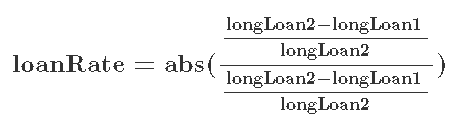

In [169]:
data['loanRate']=0
data.loc[data['OC']=='close','loanRate'] = abs(((data.loc[data['OC']=='close','longLoan2']-data.loc[data['OC']=='close','longLoan1'])/data.loc[data['OC']=='close','longLoan2'])/((data.loc[data['OC']=='close','shortLoan2']-data.loc[data['OC']=='close','shortLoan1'])/data.loc[data['OC']=='close','shortLoan2']))
data.loc[data['OC']=='open','loanRate'] = abs(((data.loc[data['OC']=='open','longLoan2']-data.loc[data['OC']=='open','longLoan1'])/data.loc[data['OC']=='open','longLoan2'])/((data.loc[data['OC']=='open','shortLoan2']-data.loc[data['OC']=='open','shortLoan1'])/data.loc[data['OC']=='open','shortLoan2']))
data['loanRate'] = data['loanRate'].replace(np.inf, -1) # NaN값으로 인한 이상치
data['loanRate'].fillna(-1,inplace=True) 

C:\Users\Hamin\AppData\Local\Temp\ipykernel_20088\3745139864.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[           nan            nan            nan 4.49196351e-01
 2.25253429e+00            nan 1.60815367e+00 0.00000000e+00
            nan 1.39154444e+00 6.32999019e-01            nan
 1.09412063e-01 5.69832794e+01            nan 1.38812256e+00
            nan 3.92890633e+00            nan 3.20927276e+01
 2.35422938e+01 1.08046784e+01            nan 2.45836886e-01
            nan 1.30986758e-01 4.42624601e-02 2.07399131e+00
 9.93795025e-01 8.14322723e-01            nan            nan
            nan            nan            nan 8.03904780e-01
 5.46026669e-01            nan            nan 0.00000000e+00
 1.85549598e-01 1.76220562e-01 0.00000000e+00            inf
 2.94581086e-01            nan            nan            inf
 1.52579763e+00 1.19328017e+01            inf            nan
 3.58044487e-01       

In [170]:
data['loanRate'].describe()

count      425.000000
mean        40.025833
std        821.103852
min         -1.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max      16927.490694
Name: loanRate, dtype: float64

In [171]:
num_col = ['inst_id', 'sgg',  'bedCount', 'revenue1', 'salescost1',
       'sga1', 'salary1', 'noi1', 'noe1', 'interest1', 'ctax1', 'profit1',
       'liquidAsset1', 'quickAsset1', 'receivableS1', 'inventoryAsset1',
       'nonCAsset1', 'tanAsset1', 'OnonCAsset1', 'receivableL1', 'debt1',
       'liquidLiabilities1', 'shortLoan1', 'NCLiabilities1', 'longLoan1',
       'netAsset1', 'surplus1', 'revenue2', 'salescost2', 'sga2', 'salary2',
       'noi2', 'noe2', 'interest2', 'ctax2', 'profit2', 'liquidAsset2',
       'quickAsset2', 'receivableS2', 'inventoryAsset2', 'nonCAsset2',
       'tanAsset2', 'OnonCAsset2', 'receivableL2', 'debt2',
       'liquidLiabilities2', 'shortLoan2', 'NCLiabilities2', 'longLoan2',
       'netAsset2', 'surplus2', 'employee1', 'employee2']

In [172]:

# 범주형 데이터의 결측치는 unknown으로 뒤에서 사용될 one-hot encoding의 에러를 피하기 위해 변수명을 각각 처리해주었습니다.

data['OC'] = data['OC'].fillna('unknown_OC') # 범주형변수 OC
data['instkind'] = data['instkind'].fillna('unknown_instkind') # 범주형변수 instkind
data['ownerChange'] = data['ownerChange'].fillna('unknown_ownerChange') # 범주형변수 ownerChange
data[num_col] = data[num_col].fillna(-1) # 연속형변수 -1
print(data.shape)

display(data.isnull().sum().sum())

(425, 63)


0

In [173]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [174]:
encoder = LabelEncoder()
data['OC']=encoder.fit_transform(data[['OC']])
print(data['OC'].unique())

[1 0 2]


c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [175]:
cat_col = ['sido', 'instkind', 'ownerChange']

In [176]:
x_data

,inst_id,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,sido_seoul,sido_ulsan,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,instkind_unknown_instkind,ownerChange_same,ownerChange_unknown_ownerChange
0,1,73,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,...,0,0,0,0,1,0,0,0,1,0
1,3,32,410.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.000000e+00,-1.000000e+00,...,0,0,1,0,0,0,0,0,1,0
2,4,89,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,...,0,0,0,0,1,0,0,0,1,0
3,7,141,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,...,0,0,1,0,0,0,0,0,1,0
4,9,32,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,424,33,0.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,4.179491e+08,...,0,0,0,0,0,1,0,0,0,1
424,425,74,-1.0,1.833906e+10,0.000000e+00,1.760117e+10,6.824241e+09,31454472.0,2.122632e+07,2.095582e+07,...,0,0,0,0,0,0,1,0,1,0
425,429,116,150.0,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,27234504.0,8.607279e+08,8.471681e+08,...,0,0,0,1,0,0,0,0,0,1
426,430,76,-1.0,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,85098148.0,1.270081e+09,8.379266e+08,...,0,0,0,0,0,0,0,1,1,0


In [199]:
x_val

,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,...,sido_seoul,sido_ulsan,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,instkind_unknown_instkind,ownerChange_same,ownerChange_unknown_ownerChange
181,-0.834286,0.706503,3.656168,-0.215082,4.725387,4.271773,0.884992,0.567415,0.181507,-0.018167,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.594286,0.720562,-0.561900,-0.215082,-0.559110,-0.603319,-0.228621,-0.533337,-0.584273,-0.018167,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,0.297143,0.762742,2.052388,5.826962,2.067533,2.585389,3.344844,-0.019940,0.014375,-0.018167,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
173,1.154286,-0.790861,-0.377667,-0.215082,-0.343692,-0.357210,-0.197617,-0.424696,-0.393810,0.077582,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.022857,0.425308,1.855248,-0.215082,2.410020,1.802573,8.568789,2.945534,1.374720,2.029226,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.502857,-0.608084,-0.372705,-0.124290,-0.356842,-0.373506,-0.225075,-0.011723,0.369576,-0.018167,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
294,0.960000,-0.952548,0.146461,9.216535,-0.559110,-0.603319,-0.227609,-0.114505,0.126017,-0.018167,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
94,-0.045714,0.200351,0.103630,0.418111,0.143065,0.210018,-0.202494,0.237273,0.792044,-0.018167,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
58,-0.045714,-0.636204,0.527760,4.472685,0.210165,0.104699,0.158365,0.311954,0.961469,-0.018167,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [178]:
x_data

,inst_id,sgg,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,sido_seoul,sido_ulsan,instkind_general_hospital,instkind_hospital,instkind_nursing_hospital,instkind_traditional_clinic,instkind_traditional_hospital,instkind_unknown_instkind,ownerChange_same,ownerChange_unknown_ownerChange
0,1,73,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,...,0,0,0,0,1,0,0,0,1,0
1,3,32,410.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.000000e+00,-1.000000e+00,...,0,0,1,0,0,0,0,0,1,0
2,4,89,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,...,0,0,0,0,1,0,0,0,1,0
3,7,141,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,...,0,0,1,0,0,0,0,0,1,0
4,9,32,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,424,33,0.0,2.233031e+10,8.484657e+08,1.849255e+10,1.232241e+10,423628901.0,1.304817e+09,4.179491e+08,...,0,0,0,0,0,1,0,0,0,1
424,425,74,-1.0,1.833906e+10,0.000000e+00,1.760117e+10,6.824241e+09,31454472.0,2.122632e+07,2.095582e+07,...,0,0,0,0,0,0,1,0,1,0
425,429,116,150.0,1.424266e+10,1.726174e+09,1.148722e+10,6.279155e+09,27234504.0,8.607279e+08,8.471681e+08,...,0,0,0,1,0,0,0,0,0,1
426,430,76,-1.0,4.892710e+10,4.157148e+10,4.721485e+09,1.514547e+09,85098148.0,1.270081e+09,8.379266e+08,...,0,0,0,0,0,0,0,1,1,0


In [181]:
# x_data = data.drop('OC',axis=1)

x_data=pd.get_dummies(x_data,drop_first=True,dtype='int')
x_train = x_data.loc[x_data['inst_id'].isin(train['inst_id'])]
x_test = x_data.loc[x_data['inst_id'].isin(test['inst_id'])]
y_train = data.loc[data['inst_id'].isin(train['inst_id']),'OC']

In [183]:
len(y_train)
# len(x_train)

298

### 스케일링

In [184]:
mscaler = MinMaxScaler()
sscaler = StandardScaler()
rscaler = RobustScaler()

x_scaled_train = rscaler.fit_transform(x_train) # 스케일러를 바꿔가며 성능비교 필요 !
x_scaled_test = rscaler.transform(x_test)
print(x_scaled_train.shape, x_scaled_test.shape)

(298, 81) (127, 81)


In [185]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, accuracy_score, recall_score, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [186]:
x_scaled_train = pd.DataFrame(x_scaled_train,columns=x_train.columns)
x_scaled_test = pd.DataFrame(x_scaled_test,columns=x_test.columns)
x_scaled_train = x_scaled_train.drop('inst_id',axis=1)
x_scaled_test = x_scaled_test.drop('inst_id',axis=1)


In [187]:
y_train.isnull().sum()

0

In [188]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(x_scaled_train,y_train)


In [189]:
rf = RandomForestClassifier(random_state=234)
rf.fit(x_tr,y_tr)
rf.predict(x_val)
rf_pred = rf.predict_proba(x_val)


In [190]:
gbm = GradientBoostingClassifier(random_state=13)

gbm.fit(x_tr,y_tr)
gbm.predict(x_val)
gbm.pred = gbm.predict_proba(x_val)


In [192]:
xgbm = XGBClassifier(random_state=25)
xgbm.fit(x_tr, y_tr)
xgbm.predict(x_val)
xgbm_pred = xgbm.predict_proba(x_val)

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use

In [193]:
lgbm = LGBMClassifier(random_state=16)
lgbm.fit(x_tr,y_tr)
lgbm.predict(x_val)
lgbm_pred = lgbm.predict_proba(x_val)


[LightGBM] [Info] Number of positive: 214, number of negative: 9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3195
[LightGBM] [Info] Number of data points in the train set: 223, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.959641 -> initscore=3.168751
[LightGBM] [Info] Start training from score 3.168751
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [196]:
models = [gbm, xgbm, lgbm, rf]
models_name = ['GBM','XGBM','LGBM','RF']

In [198]:
for model, name in zip(models, models_name):
    print('##########',name,'##############################')
    print(f'정확도: {accuracy_score(y_val, model.predict(x_val)) * 100:.4f}%')
    print(f'재현율: {recall_score(y_val, model.predict(x_val),pos_label=1) * 100:.4f}%')
    print(f'F1_score: {f1_score(y_val, model.predict(x_val)) * 100:.4f}%')
    print(f'ROC_AUC: {roc_auc_score(y_val, model.predict(x_val)) * 100:.4f}%')
    print('')

########## GBM ##############################
정확도: 94.6667%
재현율: 98.5507%
F1_score: 97.1429%
ROC_AUC: 74.2754%

########## XGBM ##############################
정확도: 96.0000%
재현율: 100.0000%
F1_score: 97.8723%
ROC_AUC: 75.0000%

########## LGBM ##############################
정확도: 97.3333%
재현율: 100.0000%
F1_score: 98.5714%
ROC_AUC: 83.3333%

########## RF ##############################
정확도: 92.0000%
재현율: 100.0000%
F1_score: 95.8333%
ROC_AUC: 50.0000%



c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use